In [9]:
import pandas as pd
import seaborn as sns
df_p = pd.read_csv('C:/Users/alexs/python/Products.csv', sep=';')
df_c = pd.read_csv('C:/Users/alexs/python/Customers.csv', sep=';')
df_o = pd.read_csv('C:/Users/alexs/python/Orders.csv', sep=';')
df_od = pd.read_csv('C:/Users/alexs/python/Order_details.csv', sep=';')
df_e = pd.read_excel('C:/Users/alexs/python/Employees.xlsx', sheet_name = 'Лист1')

In [ ]:
# Необходимо посчитать количество товаров, которые находятся в диапазоне цен от 18 до 22 и не относятся к категории Condiments.
df_p[df_p['CategoryName']!='Condiments'][['CategoryID','UnitPrice', 'CategoryName']]['UnitPrice'].between(18,22).sum()

In [ ]:
# Необходимо посчитать количество клиентов, чьи имена начинаются на латинскую букву A и чьи номера телефонов содержат 555.
df_c[df_c['ContactName'].str.startswith('A') & df_c['Phone'].str.contains('555')].shape[0]

In [ ]:
# Необходимо найти OrderID заказа, который был оформлен в 1997 году и имеет самый большой вес.
df_o[df_o['OrderDate'].astype('datetime64').dt.year == 1997].sort_values('Freight', ascending = False).head(1)['OrderID']

In [ ]:
# Необходимо найти имя клиента, который принес самую высокую чистую выручку за все время.

# df_c содержит Имя Клиента, ключ CustomerID к df_o
# df_o содержит ключ OrderID к df_od, df_od содержит данные по Выручке (выручку нужно посчитать)


df_od['Revenue'] = df_od['UnitPrice']*df_od['Quantity'] - (df_od['UnitPrice']*df_od['Quantity']*df_od['Discount'])

df_total = df_c.merge(df_o).merge(df_od)
df_total.groupby('ContactName').sum('Revenue').sort_values('Revenue', ascending=False).reset_index()

In [ ]:
# Необходимо найти чистую выручку в категории Confections за все время.

# df_o содержит ключ OrderID к df_od, df_od содержит данные по Выручке
# df_p содержит Наименование Категории, ключ ProductID к df_od
# Необходимо прописать ключ - ProductID, поскольку есть еще один столбец с одинаковым именем UnitPrice в df_p и df_od

df_od['Revenue'] = df_od['UnitPrice']*df_od['Quantity'] - (df_od['UnitPrice']*df_od['Quantity']*df_od['Discount'])

df_o.merge(df_od).merge(df_p, left_on='ProductID', right_on='ProductID').groupby('CategoryName').Revenue.sum().reset_index().query("CategoryName == 'Confections'").Revenue

In [ ]:
# Необходимо найти месяц, в который совершили рекордное количество заказов.

df_o['OrderDate'] = df_o['OrderDate'].astype('datetime64')
df_o['Year'] = df_o['OrderDate'].dt.year
df_o['Month'] = df_o['OrderDate'].dt.month
df_o.groupby(['Month', 'Year'], as_index=False).agg({'OrderID':'count'}).sort_values('OrderID', ascending=False)

In [ ]:
# Необходимо посчитать количество заказов, сделаных на 43 неделе 1996 года.

df_o['Week'] = df_o['OrderDate'].dt.isocalendar().week
df_o[(df_o['Year'] == 1996) & (df_o['Week'] == 43)].OrderID.count()

C:\Users\alexs\AppData\Local\Temp\ipykernel_25996\741487289.py:3: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df_o['OrderDate'] = df_o['OrderDate'].astype('datetime64')


<Axes: xlabel='Week'>

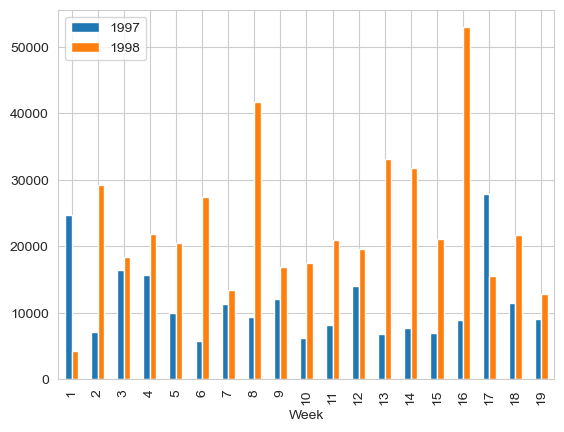

In [18]:
# Необходимо сравнить выручку по неделям в 1997 и 1998.

df_o['OrderDate'] = df_o['OrderDate'].astype('datetime64')
df_o['Year'] = df_o['OrderDate'].dt.year
df_o['Month'] = df_o['OrderDate'].dt.month
df_o['Week'] = df_o['OrderDate'].dt.isocalendar().week

df_o_f = df_o.merge(df_od)
df_o_f_1997 = df_o_f[df_o_f.Year == 1997].groupby('Week').Revenue.sum().reset_index()
df_o_f_1998 = df_o_f[df_o_f.Year == 1998].groupby('Week').Revenue.sum().reset_index()
df_o_final = df_o_f_1997.merge(df_o_f_1998, how ='inner', on = 'Week')
df_o_final = df_o_final.rename(columns = {'Revenue_x': 1997, 'Revenue_y': 1998})
sns.set_style("whitegrid")
df_o_final.plot(kind = 'bar', stacked = False, x = 'Week')

<Axes: xlabel='UnitPrice', ylabel='Quantity'>

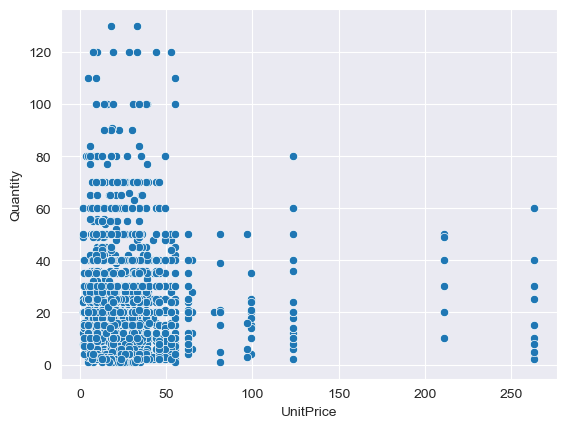

In [17]:
# Диаграмма рассеяния — Scatter Plot
sns.set_style("darkgrid")
sns.scatterplot(data=df_od, x="UnitPrice", y="Quantity")

C:\Users\alexs\AppData\Local\Temp\ipykernel_25996\3250948679.py:2: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df_o['OrderDate'] = df_o['OrderDate'].astype('datetime64')


<Axes: xlabel='Month', ylabel='OrderID'>

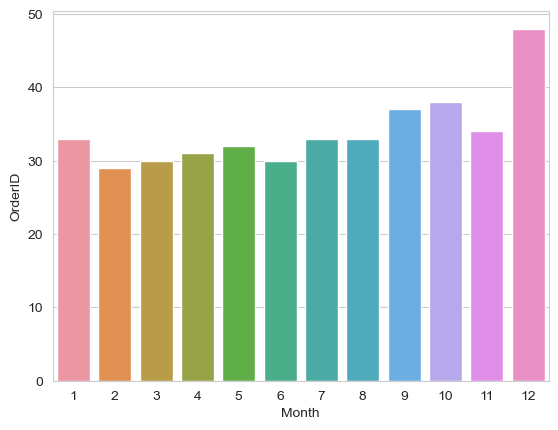

In [19]:
# Столбчатая диаграмма — Bar Plot
df_o['OrderDate'] = df_o['OrderDate'].astype('datetime64')
df_o['Year'] = df_o['OrderDate'].dt.year
df_o['Month'] = df_o['OrderDate'].dt.month

df_o2 = df_o[df_o['Year'] == 1997].groupby('Month').OrderID.count().reset_index()
sns.barplot(data=df_o2, x="Month", y="OrderID")